# <span style='color:blue'> <center>Unsupervised Learning</center> </span>
## **Chapter 1.** Clustering
#### by **Ivan Alducin**
<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [1]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importa el archivo "Online Retail.csv"
df = pd.read_csv('Online Retail.csv', encoding='latin1')
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [3]:
# Análisis Exploratorio
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   INVOICE_NO    541909 non-null  object        
 1   STOCK_CODE    541909 non-null  object        
 2   DESCRIPTION   540455 non-null  object        
 3   QUANTITY      541909 non-null  int64         
 4   INVOICE_DATE  541909 non-null  datetime64[ns]
 5   UNIT_PRICE    541909 non-null  float64       
 6   CUSTOMER_ID   406829 non-null  float64       
 7   REGION        541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [4]:
# Obtener los clientes unicos
customer = pd.DataFrame(df['CUSTOMER_ID'].unique())
customer.columns = ['CUSTOMER_ID']
customer.head()

,CUSTOMER_ID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [5]:
# Obtener la última fecha de compra por cliente
max_purchase = df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()
max_purchase.columns = ['CUSTOMER_ID', 'MAX_PURCHASE_DATE']
max_purchase.head()

,CUSTOMER_ID,MAX_PURCHASE_DATE
0,12346.0,2020-01-18 10:17:00
1,12347.0,2020-10-31 12:25:00
2,12348.0,2020-09-25 13:13:00
3,12349.0,2020-11-21 09:51:00
4,12350.0,2020-02-02 16:01:00


In [6]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón
max_purchase['RECENCY'] = (max_purchase['MAX_PURCHASE_DATE'].max() - max_purchase['MAX_PURCHASE_DATE']).dt.days

In [7]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
customer = pd.merge(customer, max_purchase, on = 'CUSTOMER_ID')
customer.head()

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY
0,17850.0,2020-10-02 14:38:00,69
1,13047.0,2020-10-24 14:02:00,47
2,12583.0,2020-12-10 14:46:00,0
3,13748.0,2020-07-04 10:13:00,159
4,15100.0,2020-10-01 10:35:00,70


Text(0.5, 1.0, 'Recency Histogram')

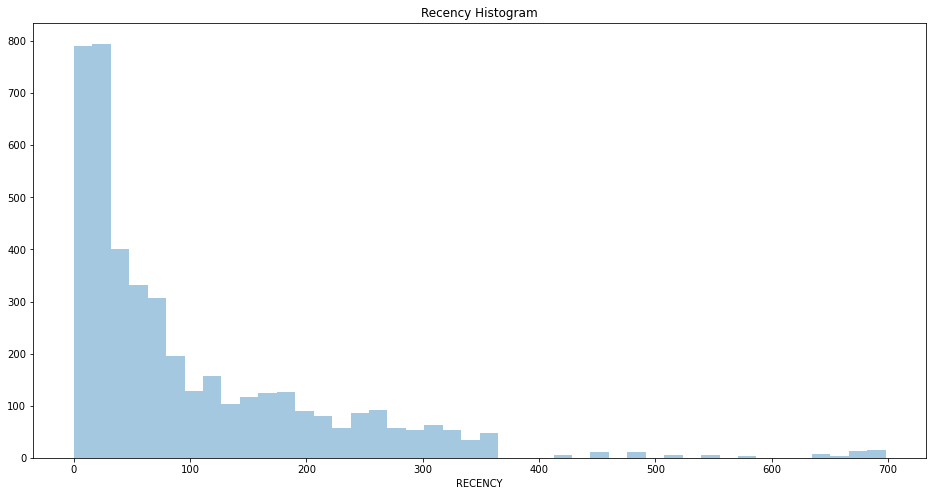

In [7]:
# Grafica un histograma de Recency
f, ax = plt.subplots(figsize=(16,8))
sns.distplot(customer['RECENCY'], kde=False)
ax.set_title('Recency Histogram')

In [8]:
customer['RECENCY'].median()

57.0

In [9]:
# Imprime la Estadística de Resumen para Recency
customer['RECENCY'].describe()

count    4372.000000
mean      101.024016
std       114.118209
min         0.000000
25%        20.000000
50%        57.000000
75%       152.000000
max       698.000000
Name: RECENCY, dtype: float64

## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [8]:
# Obtener el número de compras por cliente
frequency = df.groupby('CUSTOMER_ID')['INVOICE_NO'].nunique().reset_index()
frequency.columns = ['CUSTOMER_ID', 'FREQUENCY']
frequency.head()

,CUSTOMER_ID,FREQUENCY
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [9]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = pd.merge(customer, frequency, on='CUSTOMER_ID')
customer.head()

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY,FREQUENCY
0,17850.0,2020-10-02 14:38:00,69,35
1,13047.0,2020-10-24 14:02:00,47,18
2,12583.0,2020-12-10 14:46:00,0,18
3,13748.0,2020-07-04 10:13:00,159,5
4,15100.0,2020-10-01 10:35:00,70,6


Text(0.5, 1.0, 'Frequency Histogram')

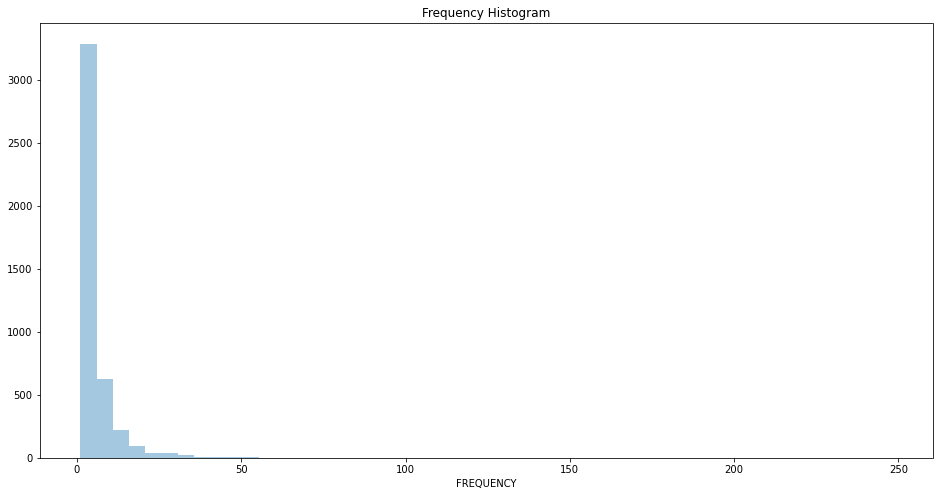

In [12]:
# Grafica un histograma de Frequency
f, ax = plt.subplots(figsize=(16,8))
sns.distplot(customer['FREQUENCY'].where(lambda x: x<3000), kde=False)
ax.set_title('Frequency Histogram')

In [13]:
# Imprime la Estadística de Resumen para Frequency
frequency['FREQUENCY'].describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: FREQUENCY, dtype: float64

## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [10]:
# Calcular el monto total por cada compra
df['MONETARY'] = df['UNIT_PRICE'] * df['QUANTITY']

# Obtener el valor monetario de compra por cliente
monetary = df.groupby('CUSTOMER_ID')['MONETARY'].sum().reset_index()
monetary.head()

,CUSTOMER_ID,MONETARY
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = pd.merge(customer, monetary, on = 'CUSTOMER_ID')
customer.head()

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY,FREQUENCY,MONETARY
0,17850.0,2020-10-02 14:38:00,69,35,5288.63
1,13047.0,2020-10-24 14:02:00,47,18,3079.10
2,12583.0,2020-12-10 14:46:00,0,18,7187.34
3,13748.0,2020-07-04 10:13:00,159,5,948.25
4,15100.0,2020-10-01 10:35:00,70,6,635.10


Text(0.5, 1.0, 'Monetary Histogram')

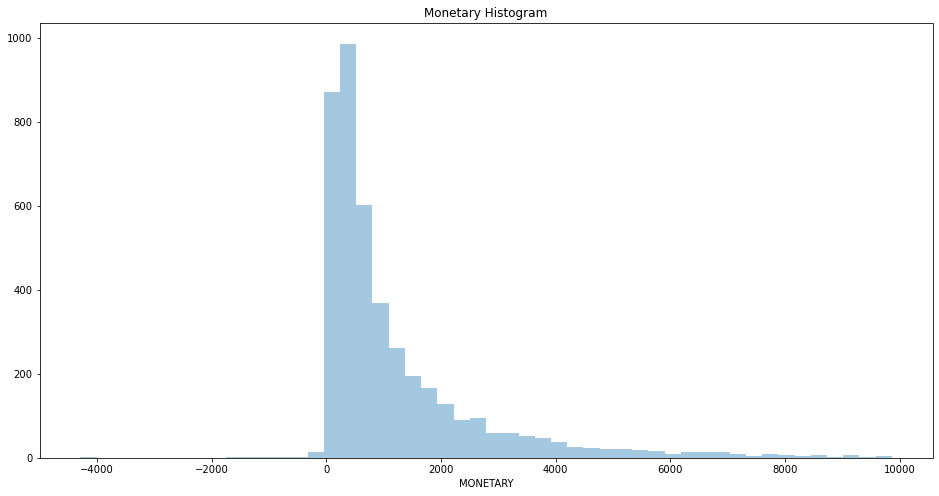

In [16]:
# Grafica un histograma de Monetary
f, ax = plt.subplots(figsize=(16,8))
sns.distplot(customer['MONETARY'].where(lambda x: x<10000), kde=False)
ax.set_title('Monetary Histogram')

In [17]:
# Imprime la Estadística de Resumen para Monetary
monetary['MONETARY'].describe()

count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: MONETARY, dtype: float64

## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [12]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [13]:
# Importa la librería de kMeans
from sklearn.cluster import KMeans

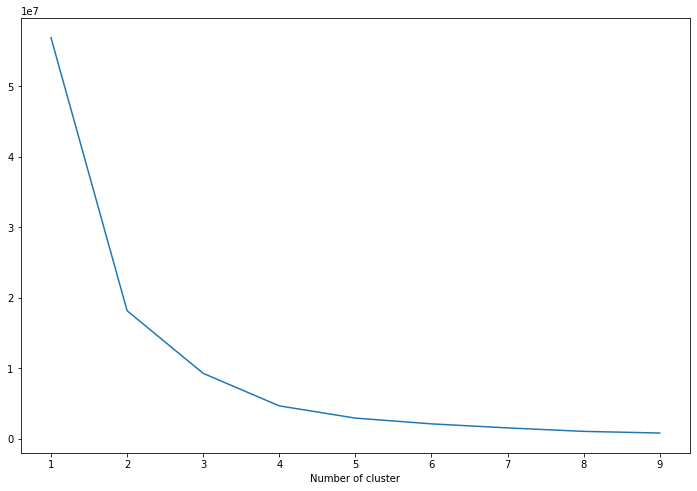

In [18]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
sse={}
recency = customer[['RECENCY']]

for k in range(1, 10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    
    # Entrena el algoritmo
    kmeans.fit(recency)
    
    # Adjunta las etiquetas
    recency["clusters"] = kmeans.labels_
    
    # Adunta la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_
    
# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [19]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = KMeans(n_clusters=4)

# Entrenar el algoritmo
kmeans.fit(customer[['RECENCY']])

# Obtener las predicciones
customer['RECENCY_CLUSTER'] = kmeans.predict(customer[['RECENCY']])

# Ordenar los clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Estadística Descriptiva del cluster creado
customer.groupby('RECENCY_CLUSTER')['RECENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
RECENCY_CLUSTER,,,,,,,,
0,76.0,589.934211,94.109912,455.0,486.0,639.0,667.0,698.0
1,614.0,279.363192,44.867978,212.0,243.0,270.5,313.5,425.0
2,956.0,143.399582,35.224120,88.0,114.0,142.0,174.0,211.0
3,2726.0,32.363536,24.061944,0.0,12.0,25.0,51.0,87.0


In [22]:
# Instanciar el algoritmo con 4 clusters para Frequency 
kmeans = KMeans(n_clusters=4)

# Entrenar el algoritmo
kmeans.fit(customer[['FREQUENCY']])

# Obtener las predicciones
customer['FREQUENCY_CLUSTER'] = kmeans.predict(customer[['FREQUENCY']])

# Ordenar los clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Estadística Descriptiva de los clusters
customer.groupby('FREQUENCY_CLUSTER')['FREQUENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
FREQUENCY_CLUSTER,,,,,,,,
0,3638.0,2.649808,1.772600,1.0,1.00,2.0,4.00,7.0
1,634.0,12.435331,4.244102,8.0,9.00,11.0,15.00,25.0
2,94.0,38.946809,14.795645,26.0,28.25,33.5,43.00,89.0
3,6.0,167.500000,56.807570,118.0,120.50,148.5,210.25,248.0


In [23]:
# Instanciar el algoritmo con 4 clusters para Monetary 
kmeans = KMeans(n_clusters=4)

# Entrenar el algoritmo
kmeans.fit(customer[['MONETARY']])

# Obtener las predicciones
customer['MONETARY_CLUSTER'] = kmeans.predict(customer[['MONETARY']])

# Ordenar los clusters ¿Como tienes que ordenar el cluster?
customer = order_cluster('MONETARY_CLUSTER', 'MONETARY', customer, True)

# Estadística Descriptiva de los clusters
customer.groupby('MONETARY_CLUSTER')['MONETARY'].describe()

,count,mean,std,min,25%,50%,75%,max
MONETARY_CLUSTER,,,,,,,,
0,4249.0,1155.749653,1391.274810,-4287.63,285.89,623.16,1469.450,8124.40
1,105.0,15185.934476,7543.107378,8221.09,10097.37,12288.22,17078.450,40340.78
2,15.0,71423.516000,28632.631870,50415.49,52287.28,57385.88,77008.730,132572.62
3,3.0,241136.560000,47874.073443,187482.17,221960.33,256438.49,267963.755,279489.02


## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [24]:
# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer['SCORE'] = customer['RECENCY_CLUSTER'] + customer['FREQUENCY_CLUSTER'] + customer['MONETARY_CLUSTER']

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
customer.groupby('SCORE')['RECENCY','FREQUENCY','MONETARY'].mean()

,RECENCY,FREQUENCY,MONETARY
SCORE,,,
0,589.934211,1.131579,217.693816
1,280.271523,1.443709,384.281341
2,145.884074,2.313109,664.340249
3,37.675899,3.301749,1004.184846
4,23.920213,12.124113,3411.487358
5,14.716049,23.987654,10547.364444
6,9.608696,39.173913,16689.731304
7,15.857143,74.357143,60906.152857
8,3.833333,113.000000,162131.253333


In [25]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):
    if(0 <= score <= 1):
        s = 'Low-Value'
    elif(2 <= score <= 4):
        s = "Average"
    elif(5 <= score <= 6):
        s = "Potential"
    elif(7 <= score <= 8):
        s = "High-Value"
    else:
        s = "Nothing"
    return s


# Crear una columna aplicando esta función al campo 'SCORE'
customer['SEGMENT'] = customer.apply(lambda x: segment(x['SCORE']), axis=1)

In [26]:
# Vamos a dar un vistazo a la tabla final
customer.sample(10)

,CUSTOMER_ID,MAX_PURCHASE_DATE,RECENCY,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
3970,14041.0,2020-03-18 13:25:00,267,1,141.41,1,0,0,1,Low-Value
473,16712.0,2020-11-30 13:48:00,10,11,3645.43,3,1,0,4,Average
3232,17960.0,2020-06-21 14:15:00,172,1,73.78,2,0,0,2,Average
2207,14537.0,2020-10-13 10:54:00,58,1,355.56,3,0,0,3,Average
1934,12756.0,2020-09-14 09:31:00,87,1,112.08,3,0,0,3,Average
521,15214.0,2020-11-29 14:51:00,11,8,1661.44,3,1,0,4,Average
2197,12536.0,2020-11-10 14:52:00,30,5,4106.82,3,0,0,3,Average
1560,17970.0,2020-12-05 20:03:00,4,1,582.59,3,0,0,3,Average
215,14702.0,2020-11-21 11:50:00,19,18,3250.64,3,1,0,4,Average
928,14167.0,2020-12-01 15:44:00,9,4,574.84,3,0,0,3,Average


In [27]:
# Imprime la proporción o el total de clientes por segmento
customer.value_counts('SEGMENT')

SEGMENT
Average       3545
Low-Value      680
Potential      127
High-Value      20
dtype: int64

Text(0.5, 1.0, 'Monetary vs Recency by Segment')

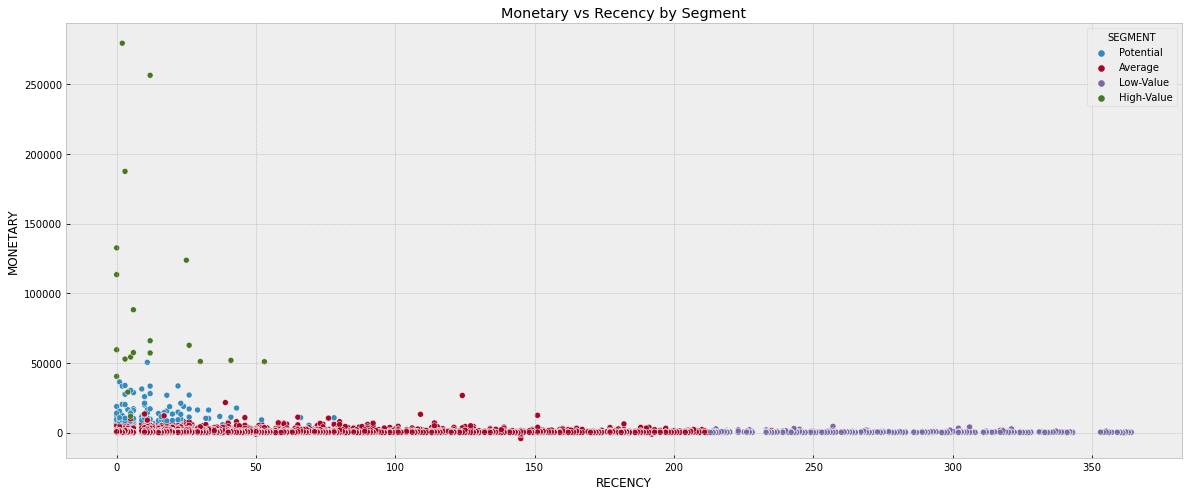

In [28]:
# Define un estilo 'bmh'
plt.style.use('bmh')

# Filtra los valores para RECENCY < 400
qry = customer.query('RECENCY < 400')

# Crea un grafico de dispersion de 'MONETARY' VS 'RECENCY' por Segmento
f, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data = qry,
                x = 'RECENCY',
                y = 'MONETARY',
                hue = 'SEGMENT')
ax.set_title('Monetary vs Recency by Segment')

Text(0.5, 1.0, 'Monetary vs Frequency by Segment')

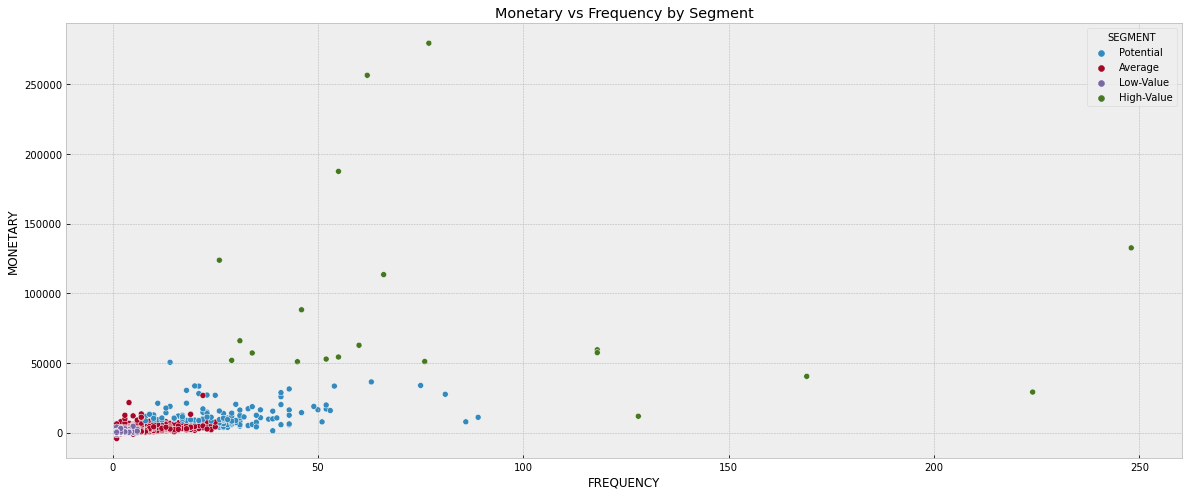

In [29]:
# Crea un grafico de dispersion de 'MONETARY' vs 'FREQUENCY' vs  por Segmento
f, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(data = customer,
                x = 'FREQUENCY',
                y = 'MONETARY',
                hue = 'SEGMENT')
ax.set_title('Monetary vs Frequency by Segment')

In [30]:
customer.to_csv('data.csv')